<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plotando-todos-os-100,-200-e-300" data-toc-modified-id="Plotando-todos-os-100,-200-e-300-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plotando todos os 100, 200 e 300</a></span><ul class="toc-item"><li><span><a href="#Distribs" data-toc-modified-id="Distribs-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Distribs</a></span></li><li><span><a href="#CC" data-toc-modified-id="CC-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>CC</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import locale
locale.setlocale(locale.LC_ALL, '')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14,})
mpl.rcParams['axes.formatter.use_locale'] = True

import re

In [2]:
curva_ctab = pd.read_csv('ctab.csv', delimiter=';', decimal=',')
curva_ctab.head()

,X Intensity,CTAB200 1,CTAB200 2,CTAB200 3,CTAB300 1,CTAB300 2,CTAB300 3,CTAB100 1,CTAB100 2,CTAB100 3
0,0.400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


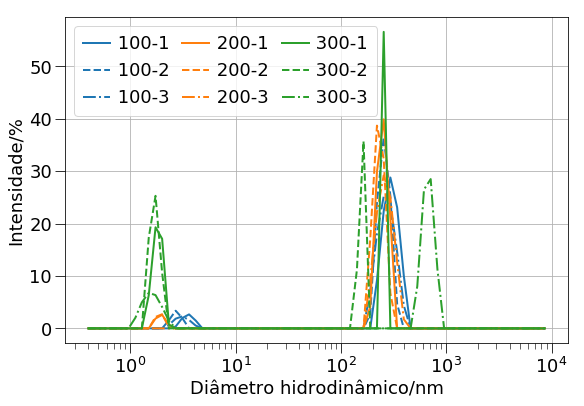

In [53]:
mpl.rcParams.update({'font.size': 18})
tipos = ['CTAB100', 'CTAB200', 'CTAB300']

tipos_d = {'CTAB200':'CTAB 200', 'CTAB300':'CTAB 300', 'CTAB100':'CTAB 100'}
cores_d = {'CTAB200':'C1', 'CTAB300':'C2', 'CTAB100':'C0'}
linhas = ['-', '--', '-.']
x = curva_ctab['X Intensity']

fig = plt.figure(figsize=(9,6))
i = 0

for tipo in tipos:
    linhas = ['-', '--', '-.']
    linhas.reverse()
    
    for col in curva_ctab.columns.sort_values():
        if tipo in col:
            plt.plot(x, curva_ctab[col], label=tipos_d[tipo][4:] + '-{0}'.format(i+1), 
                     c=cores_d[tipo], linestyle=linhas.pop(),
                    linewidth=2)
            i += 1
    i = 0

#plt.plot(curva_ctab['X Intensity'], curva_ctab['CTAB200 1'])

legend_config = dict(fontsize=18, labelspacing=0.5, borderpad=0.5, 
           handlelength=1.5, handletextpad=0.1, columnspacing=0.7)

plt.xscale('log')
plt.legend(ncol=3, loc=2, **legend_config)
plt.xlabel('Diâmetro hidrodinâmico/nm')
plt.ylabel('Intensidade/%')
#plt.yscale('log')
#plt.savefig('CTAB_distrib.png', dpi=300)
plt.grid()
ax = plt.gca()
ax.tick_params(axis='both', which='minor', length=6)
ax.tick_params(axis='both', which='major', length=10)
plt.savefig(r'..\..\..\dls\ctab_distrib.pdf')

In [54]:
curva_ttab = pd.read_csv('ttab.csv', delimiter=';', decimal=',')
curva_ttab.head()

,X Intensity,TTAB 200,TTAB 200.1,TTAB 200.2,TTAB 100,TTAB 100.1,TTAB 100.2,TTAB 300,TTAB 300.1,TTAB 300.2
0,0.400,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.463,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.536,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.621,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.719,2.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


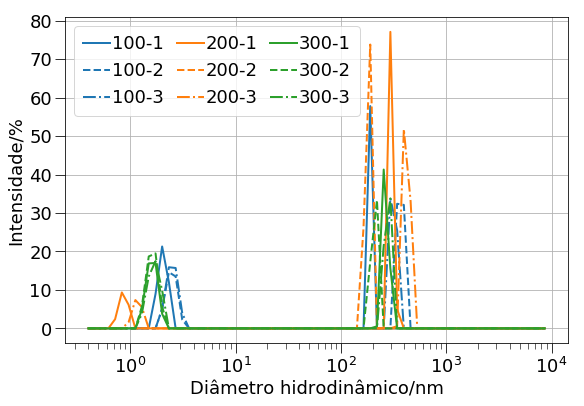

In [55]:
tipos = ['TTAB 100', 'TTAB 200', 'TTAB 300']
conv_nomes = {
           'TTAB 200':'TTAB 200 1', 'TTAB 200.1':'TTAB 200 2', 'TTAB 200.2':'TTAB 200 3',
           'TTAB 300':'TTAB 300 1', 'TTAB 300.1':'TTAB 300 2', 'TTAB 300.2':'TTAB 300 3', 
           'TTAB 100':'TTAB 100 1', 'TTAB 100.1':'TTAB 100 2', 'TTAB 100.2':'TTAB 100 3'}

r_conc = re.compile(r'\d\d\d')

cores_d = {'200':'C1', '300':'C2', '100':'C0'}
linhas = ['-', '--', '-.']
x = curva_ttab['X Intensity']
ys = curva_ttab.loc[:,'TTAB 200':]
i = 0


linhas = ['-', '--', '-.']
linhas.reverse()
linhas = linhas * 3

fig, ax = plt.subplots(1, 1, figsize=(9,6))

for y in ys.columns.sort_values():
    cor = cores_d[r_conc.findall(y)[0]]
    
    ax.plot(x, y, data=ys, label=conv_nomes[y][5:-2] + '-' + conv_nomes[y][-1], 
            c=cor, linestyle=linhas.pop(), linewidth=2)

    
ax.set_xscale('log')
ax.legend(ncol=3, loc=2, **legend_config)
ax.set_xlabel('Diâmetro hidrodinâmico/nm')
ax.set_ylabel('Intensidade/%')
ax.grid()
ax.tick_params(axis='both', which='minor', length=6)
ax.tick_params(axis='both', which='major', length=10)
fig.savefig(r'..\..\..\dls\ttab_distrib.pdf')


In [56]:
curva_dtab = pd.read_csv('dtab.csv', delimiter=';', decimal=',')
curva_dtab.head()

,X Intensity,DTAB200 1,DTAB200 2,DTAB200 3
0,0.400,0.0,0.0,0.0
1,0.463,0.0,0.0,0.0
2,0.536,0.0,0.0,0.0
3,0.621,0.0,0.0,0.0
4,0.719,0.0,0.0,0.0


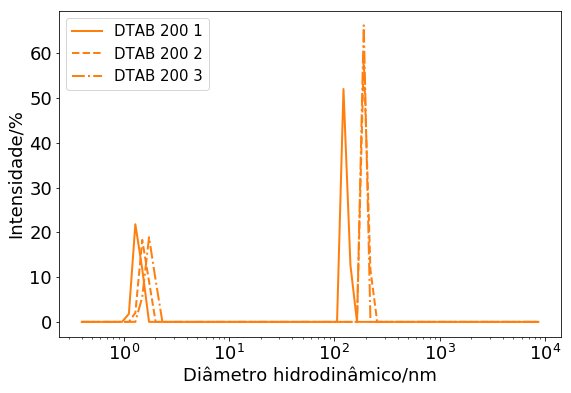

In [57]:
tipos = ['DTAB 200']
conv_nomes = {'DTAB200 1':'DTAB 200 1', 'DTAB200 2':'DTAB 200 2', 'DTAB200 3':'DTAB 200 3'}


r_conc = re.compile(r'\d\d\d')

cores_d = {'200':'C1', '300':'C2', '100':'C0'}
linhas = ['-', '--', '-.']
x = curva_dtab['X Intensity']
ys = curva_dtab.loc[:,'DTAB200 1':]
i = 0


linhas = ['-', '--', '-.']
linhas.reverse()
linhas = linhas * 3

fig, ax = plt.subplots(1, 1, figsize=(9,6))

for y in ys.columns.sort_values():
    cor = cores_d[r_conc.findall(y)[0]]
    ax.plot(x, y, data=ys, label=conv_nomes[y], c=cor, linestyle=linhas.pop(), linewidth=2)

    
ax.set_xscale('log')
ax.legend(ncol=1, fontsize='small', loc=2)
ax.set_xlabel('Diâmetro hidrodinâmico/nm')
ax.set_ylabel('Intensidade/%')

fig.savefig(r'C:\Users\Karl\Google Drive\Doutorado\Tese\imagens\dls\dtab_distrib.pdf')


In [58]:
cc_ttab = pd.read_csv('ttab_cc.csv', delimiter=';', decimal=',')
cc_ttab.head()

,X Lag Time/us,Record 4: TTAB200 1,Record 5: TTAB200 2,Record 6: TTAB200 3,Record 10: TTAB100 1,Record 11: TTAB100 2,Record 12: TTAB100 3,Record 13: TTAB300 1,Record 14: TTAB300 2,Record 15: TTAB300 3
0,0.5,1.08,1.06,1.05,1.14,0.991,1.010,1.030,1.17,0.972
1,1.0,1.07,1.05,1.04,1.11,0.959,0.968,0.991,1.13,0.928
2,1.5,1.06,1.04,1.03,1.07,0.932,0.939,0.955,1.09,0.886
3,2.0,1.06,1.03,1.02,1.05,0.910,0.910,0.926,1.06,0.854
4,2.5,1.05,1.02,1.01,1.04,0.894,0.893,0.901,1.04,0.831


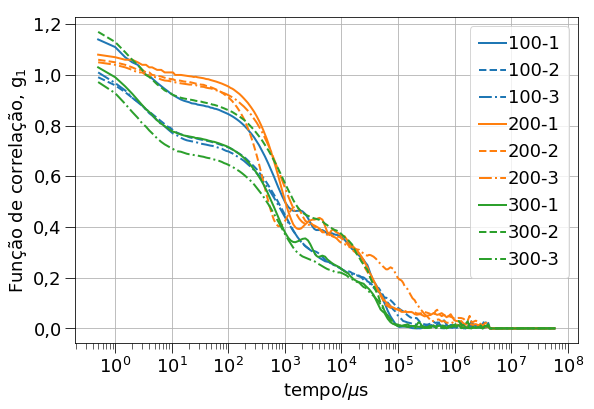

In [59]:
tipos = ['TTAB100', 'TTAB200', 'TTAB300']
cores = ['C0', 'C1', 'C2']
linhas = ['-', '--', '-.']
linhas.reverse()
x = cc_ttab['X Lag Time/us']

i = 0
fig = plt.figure(figsize=(9,6))
for tipo, cor in zip(tipos, cores):
    linhas = ['-', '--', '-.']
    linhas.reverse()
    for col in cc_ttab.columns:
        if tipo in col:
            label = tipo[4:] + '-{0}'.format(i+1)
            label = label.replace('B', 'B ')
            plt.plot(x, cc_ttab[col], label=label, c=cor, linestyle=linhas.pop(), linewidth=2)
            i += 1
    i = 0
#plt.plot(curva_ctab['X Intensity'], curva_ctab['CTAB200 1'])

plt.xscale('log')
#plt.legend(fontsize='small')
plt.legend(**legend_config)
plt.xlabel('tempo/$\mu$s')
plt.ylabel('Função de correlação, g$_1$')
ax = plt.gca()

ax.grid()
ax.tick_params(axis='both', which='minor', length=6)
ax.tick_params(axis='both', which='major', length=10)

fig.savefig(r'..\..\..\dls\ttab_CC.pdf')

In [49]:
cc_ctab = pd.read_csv('ctab_cc.csv', delimiter=';', decimal=',')
cc_ctab.head()

,X Lag Time,Record 7: CTAB200 1,Record 8: CTAB200 2,Record 9: CTAB200 3,Record 16: CTAB300 1,Record 17: CTAB300 2,Record 18: CTAB300 3,Record 19: CTAB100 1,Record 20: CTAB100 2,Record 21: CTAB100 3
0,0.5,1.020,0.989,0.946,1.25,1.35,0.940,0.967,0.976,0.938
1,1.0,1.020,0.990,0.944,1.23,1.32,0.913,0.959,0.964,0.931
2,1.5,1.010,0.979,0.935,1.20,1.30,0.885,0.947,0.956,0.920
3,2.0,1.000,0.972,0.928,1.18,1.28,0.863,0.937,0.949,0.910
4,2.5,0.997,0.971,0.922,1.16,1.26,0.847,0.927,0.944,0.902


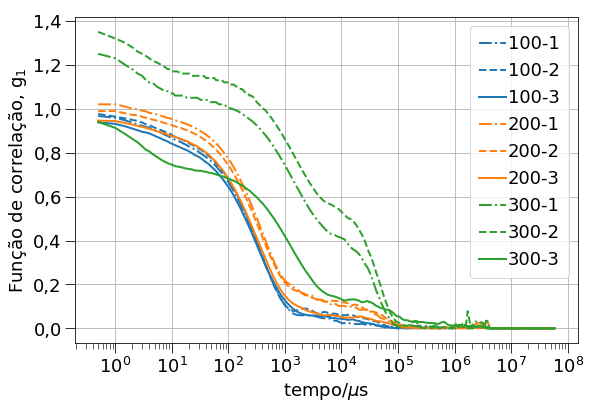

In [61]:
tipos = ['CTAB100', 'CTAB200', 'CTAB300']
cores = ['C0', 'C1', 'C2']
linhas = ['-', '--', '-.']
linhas.reverse()
x = cc_ctab['X Lag Time']
fig = plt.figure(figsize=(9,6))
i = 0

for tipo, cor in zip(tipos, cores):
    linhas = ['-', '--', '-.']
    for col in cc_ctab.columns:
        if tipo in col:
            label = tipo[4:] + '-{0}'.format(i+1)
            #label = label.replace('B', 'B ')
            plt.plot(x, cc_ctab[col], label=label, c=cor, linestyle=linhas.pop(), linewidth=2)
            i += 1
    i = 0
#plt.plot(curva_ctab['X Intensity'], curva_ctab['CTAB200 1'])

plt.xscale('log')
#plt.legend(fontsize='small')
plt.legend(**legend_config)
plt.xlabel('tempo/$\mu$s')
plt.ylabel('Função de correlação, g$_1$')

ax = plt.gca()
ax.grid()
ax.tick_params(axis='both', which='minor', length=6)
ax.tick_params(axis='both', which='major', length=10)

fig.savefig(r'..\..\..\dls\ctab_CC.pdf')

In [62]:
cc_dtab = pd.read_csv('dtab_cc.csv', delimiter=';', decimal=',')
cc_dtab.head()

,X Lag Time,Record 1: DTAB200 1,Record 2: DTAB200 2,Record 3: DTAB200 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,0.5,1.50,1.35,1.33,NaN,NaN,NaN,NaN,NaN
1,1.0,1.49,1.33,1.31,NaN,NaN,NaN,NaN,NaN
2,1.5,1.47,1.31,1.29,NaN,NaN,NaN,NaN,NaN
3,2.0,1.45,1.30,1.28,NaN,NaN,NaN,NaN,NaN
4,2.5,1.44,1.29,1.27,NaN,NaN,NaN,NaN,NaN


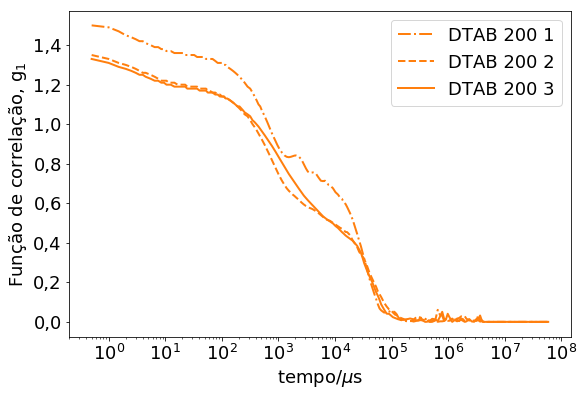

In [63]:
tipos = ['DTAB200']
cores = ['C1', 'C2']
linhas = ['-', '--', '-.']
linhas.reverse()
x = cc_dtab['X Lag Time']

i = 0
fig = plt.figure(figsize=(9,6))

for tipo, cor in zip(tipos, cores):
    linhas = ['-', '--', '-.']
    for col in cc_dtab.columns:
        if tipo in col:
            label = tipo + ' {0}'.format(i+1)
            label = label.replace('B', 'B ')
            plt.plot(x, cc_dtab[col], label=label, c=cor, linestyle=linhas.pop(), linewidth=2)
            i += 1
    i = 0
#plt.plot(curva_ctab['X Intensity'], curva_ctab['CTAB200 1'])

plt.xscale('log')
#plt.legend(fontsize='small')
plt.legend()
plt.xlabel('tempo/$\mu$s')
plt.ylabel('Função de correlação, g$_1$')
#plt.yscale('log')
#plt.savefig('DTAB_CC.png', dpi=300)
fig.savefig(r'..\..\..\dls\dtab_CC.pdf')

# Plotando todos os 100, 200 e 300

## Distribs

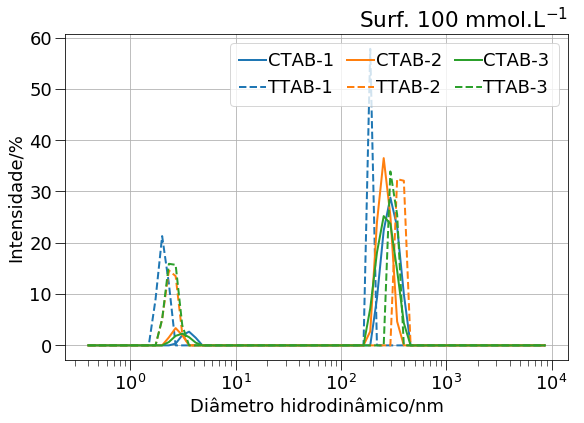

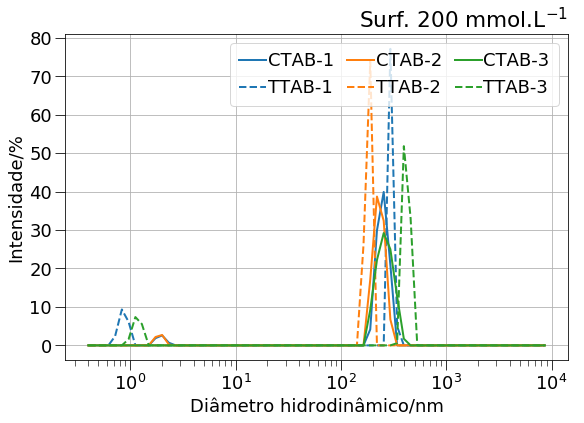

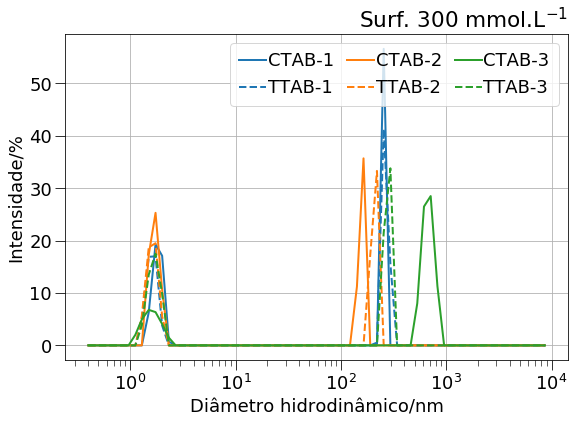

In [68]:
cores = ['C0', 'C1', 'C2']
estilos = ['-', '--', '-.']
resurf = re.compile(r'(CTAB|TTAB)')
reconc = re.compile(r'\d\d\d')
lw = 2

conv_nomes_ttab = {
           'TTAB 200':'TTAB-1', 'TTAB 200.1':'TTAB-2', 'TTAB 200.2':'TTAB-3',
           'TTAB 300':'TTAB-1', 'TTAB 300.1':'TTAB-2', 'TTAB 300.2':'TTAB-3', 
           'TTAB 100':'TTAB-1', 'TTAB 100.1':'TTAB-2', 'TTAB 100.2':'TTAB-3'}

conv_nomes_ctab = {
                  'CTAB200 1':'CTAB-1', 'CTAB300 1':'CTAB-1', 'CTAB100 1':'CTAB-1',
                  'CTAB200 2':'CTAB-2', 'CTAB300 2':'CTAB-2', 'CTAB100 2':'CTAB-2',
                  'CTAB200 3':'CTAB-3', 'CTAB300 3':'CTAB-3', 'CTAB100 3':'CTAB-3'}

fig1, ax1 = plt.subplots(1, 1, figsize=(9,6))
fig2, ax2 = plt.subplots(1, 1, figsize=(9,6))
fig3, ax3 = plt.subplots(1, 1, figsize=(9,6))

c100 = 0
c200 = 0
c300 = 0

for c, t in zip(curva_ctab.columns.sort_values(), curva_ttab.columns.sort_values()):
    if (c == 'X Intensity') or (t == 'X Intensity'):
        continue
    concC = reconc.findall(c)[0]
    concT = reconc.findall(t)[0]
    
    if concC == '100':
        ax1.plot('X Intensity', c, data=curva_ctab, label=conv_nomes_ctab[c], ls='-', c=cores[c100], lw=lw)
        ax1.plot('X Intensity', t, data=curva_ttab, label=conv_nomes_ttab[t], ls='--', c=cores[c100], lw=lw)
        c100 += 1
    if concC == '200':
        ax2.plot('X Intensity', c, data=curva_ctab, label=conv_nomes_ctab[c], ls='-', c=cores[c200], lw=lw)
        ax2.plot('X Intensity', t, data=curva_ttab, label=conv_nomes_ttab[t], ls='--', c=cores[c200], lw=lw)
        c200 += 1
    if concC == '300':
        ax3.plot('X Intensity', c, data=curva_ctab, label=conv_nomes_ctab[c], ls='-', c=cores[c300], lw=lw)
        ax3.plot('X Intensity', t, data=curva_ttab, label=conv_nomes_ttab[t], ls='--',c=cores[c300], lw=lw)
        c300 += 1

ax1.legend(ncol=3, **legend_config)
ax2.legend(ncol=3, **legend_config)
ax3.legend(ncol=3, **legend_config)

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')

ax1.set_xlabel('Diâmetro hidrodinâmico/nm')
ax1.set_ylabel('Intensidade/%')
ax2.set_xlabel('Diâmetro hidrodinâmico/nm')
ax2.set_ylabel('Intensidade/%')
ax3.set_xlabel('Diâmetro hidrodinâmico/nm')
ax3.set_ylabel('Intensidade/%')

ax1.set_title('Surf. 100 mmol.L$^{-1}$', loc='right')
ax2.set_title('Surf. 200 mmol.L$^{-1}$', loc='right')
ax3.set_title('Surf. 300 mmol.L$^{-1}$', loc='right')

ax1.grid()
ax1.tick_params(axis='both', which='minor', length=6)
ax1.tick_params(axis='both', which='major', length=10)
ax2.grid()
ax2.tick_params(axis='both', which='minor', length=6)
ax2.tick_params(axis='both', which='major', length=10)
ax3.grid()
ax3.tick_params(axis='both', which='minor', length=6)
ax3.tick_params(axis='both', which='major', length=10)

fig1.savefig(r'..\..\..\dls\100_distrib.pdf')
fig1.savefig(r'..\..\..\dls\200_distrib.pdf')
fig1.savefig(r'..\..\..\dls\300_distrib.pdf')

## CC

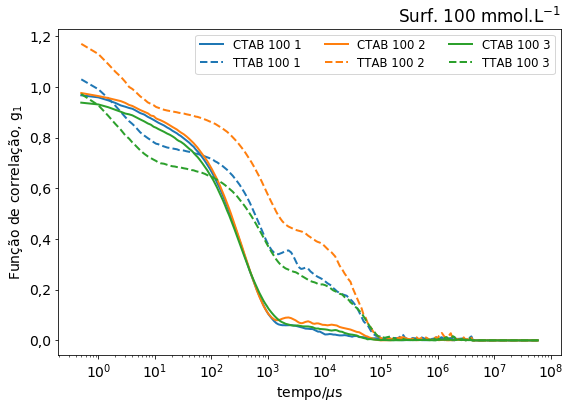

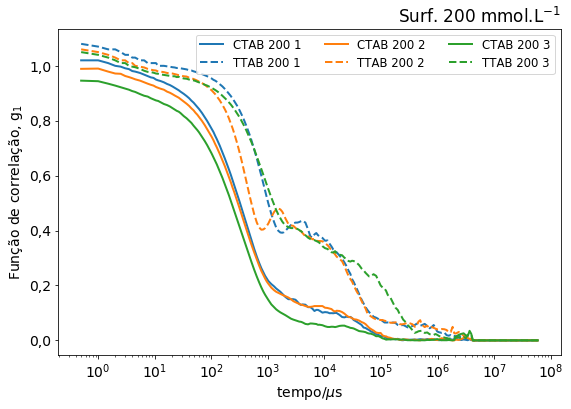

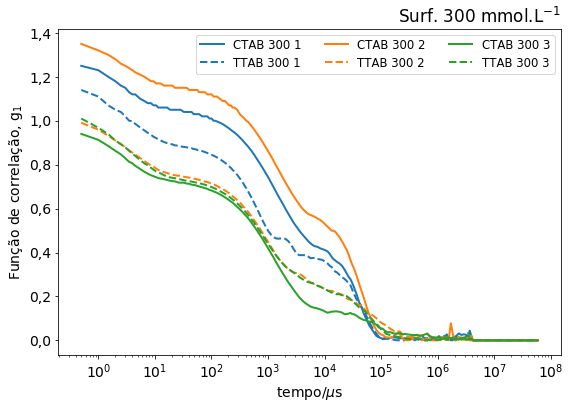

In [17]:
cores = ['C0', 'C1', 'C2']
estilos = ['-', '--', '-.']
resurf = re.compile(r'(CTAB|TTAB)')
reconc = re.compile(r'\d\d\d')
lw = 2
# x = cc_ttab['X Lag Time/us']


conv_nomes_ttab = {
           'TTAB 200':'TTAB 200 1', 'TTAB 200.1':'TTAB 200 2', 'TTAB 200.2':'TTAB 200 3',
           'TTAB 300':'TTAB 300 1', 'TTAB 300.1':'TTAB 300 2', 'TTAB 300.2':'TTAB 300 3', 
           'TTAB 100':'TTAB 100 1', 'TTAB 100.1':'TTAB 100 2', 'TTAB 100.2':'TTAB 100 3'}

conv_nomes_ctab = {
                  'CTAB200 1':'CTAB 200 1', 'CTAB300 1':'CTAB 300 1', 'CTAB100 1':'CTAB 100 1',
                  'CTAB200 2':'CTAB 200 2', 'CTAB300 2':'CTAB 300 2', 'CTAB100 2':'CTAB 100 2',
                  'CTAB200 3':'CTAB 200 3', 'CTAB300 3':'CTAB 300 3', 'CTAB100 3':'CTAB 100 3'}

fig1, ax1 = plt.subplots(1, 1, figsize=(9,6))
fig2, ax2 = plt.subplots(1, 1, figsize=(9,6))
fig3, ax3 = plt.subplots(1, 1, figsize=(9,6))

c100 = 0
c200 = 0
c300 = 0

for c, t in zip(cc_ctab.columns.sort_values(), cc_ttab.columns.sort_values()):
    if (c == 'X Lag Time/us') or (t == 'X Lag Time/us'):
        continue
    concC = reconc.findall(c)[0]
    concT = reconc.findall(t)[0]
    
    if concC == '100':
        ax1.plot('X Lag Time', c, data=cc_ctab, label=f'CTAB 100 {c100+1}', ls='-', c=cores[c100], lw=lw)
        ax1.plot('X Lag Time/us', t, data=cc_ttab, label=f'TTAB 100 {c100+1}', ls='--', c=cores[c100], lw=lw)
        c100 += 1
    if concC == '200':
        ax2.plot('X Lag Time', c, data=cc_ctab, label=f'CTAB 200 {c200+1}', ls='-', c=cores[c200], lw=lw)
        ax2.plot('X Lag Time/us', t, data=cc_ttab, label=f'TTAB 200 {c200+1}', ls='--', c=cores[c200], lw=lw)
        c200 += 1
    if concC == '300':
        ax3.plot('X Lag Time', c, data=cc_ctab, label=f'CTAB 300 {c300+1}', ls='-', c=cores[c300], lw=lw)
        ax3.plot('X Lag Time/us', t, data=cc_ttab, label=f'TTAB 300 {c300+1}', ls='--',c=cores[c300], lw=lw)
        c300 += 1

ax1.legend(ncol=3, loc=1, fontsize='small')
ax2.legend(ncol=3, loc=1, fontsize='small')
ax3.legend(ncol=3, loc=1, fontsize='small')

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')

ax1.set_xlabel('tempo/$\mu$s')
ax1.set_ylabel('Função de correlação, g$_1$')
ax2.set_xlabel('tempo/$\mu$s')
ax2.set_ylabel('Função de correlação, g$_1$')
ax3.set_xlabel('tempo/$\mu$s')
ax3.set_ylabel('Função de correlação, g$_1$')

ax1.set_title('Surf. 100 mmol.L$^{-1}$', loc='right')
ax2.set_title('Surf. 200 mmol.L$^{-1}$', loc='right')
ax3.set_title('Surf. 300 mmol.L$^{-1}$', loc='right')

fig1.savefig(r'C:\Users\Karl\Google Drive\Doutorado\Tese\imagens\dls\100_CC.pdf')
fig2.savefig(r'C:\Users\Karl\Google Drive\Doutorado\Tese\imagens\dls\200_CC.pdf')
fig3.savefig(r'C:\Users\Karl\Google Drive\Doutorado\Tese\imagens\dls\300_CC.pdf')

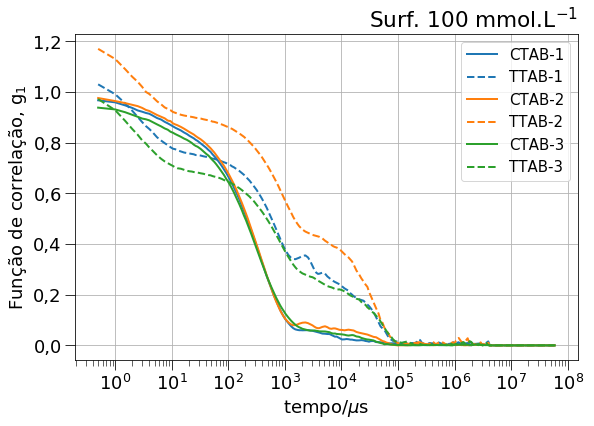

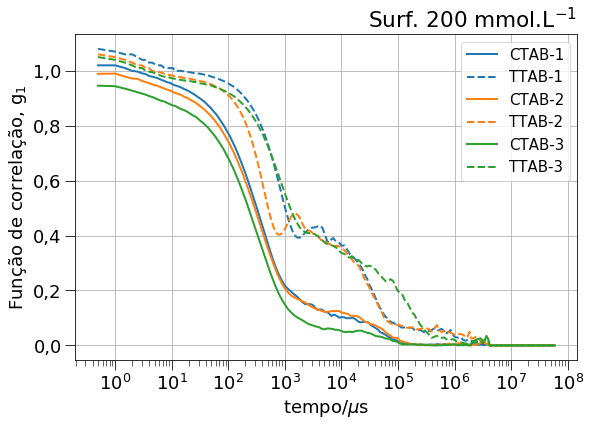

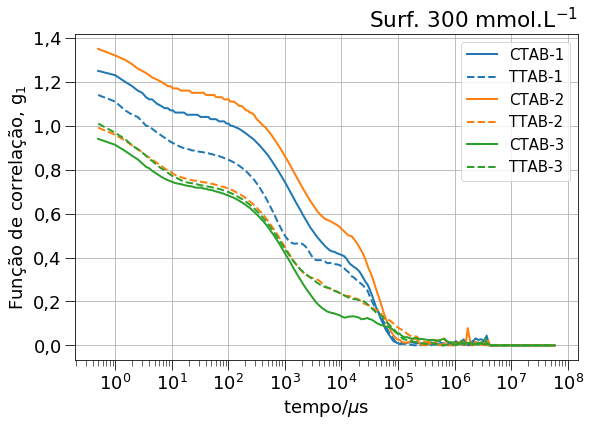

In [72]:
cores = ['C0', 'C1', 'C2']
estilos = ['-', '--', '-.']
resurf = re.compile(r'(CTAB|TTAB)')
reconc = re.compile(r'\d\d\d')
lw = 2
# x = cc_ttab['X Lag Time/us']


conv_nomes_ttab = {
           'TTAB 200':'TTAB-1', 'TTAB 200.1':'TTAB-2', 'TTAB 200.2':'TTAB-3',
           'TTAB 300':'TTAB-1', 'TTAB 300.1':'TTAB-2', 'TTAB 300.2':'TTAB-3', 
           'TTAB 100':'TTAB-1', 'TTAB 100.1':'TTAB-2', 'TTAB 100.2':'TTAB-3'}

conv_nomes_ctab = {
                  'CTAB200 1':'CTAB-1', 'CTAB300 1':'CTAB-1', 'CTAB100 1':'CTAB-1',
                  'CTAB200 2':'CTAB-2', 'CTAB300 2':'CTAB-2', 'CTAB100 2':'CTAB-2',
                  'CTAB200 3':'CTAB-3', 'CTAB300 3':'CTAB-3', 'CTAB100 3':'CTAB-3'}

fig1, ax1 = plt.subplots(1, 1, figsize=(9,6))
fig2, ax2 = plt.subplots(1, 1, figsize=(9,6))
fig3, ax3 = plt.subplots(1, 1, figsize=(9,6))

c100 = 0
c200 = 0
c300 = 0

for c, t in zip(cc_ctab.columns.sort_values(), cc_ttab.columns.sort_values()):
    if (c == 'X Lag Time/us') or (t == 'X Lag Time/us'):
        continue
    concC = reconc.findall(c)[0]
    concT = reconc.findall(t)[0]
    
    if concC == '100':
        ax1.plot('X Lag Time', c, data=cc_ctab, label=f'CTAB-{c100+1}', ls='-', c=cores[c100], lw=lw)
        ax1.plot('X Lag Time/us', t, data=cc_ttab, label=f'TTAB-{c100+1}', ls='--', c=cores[c100], lw=lw)
        c100 += 1
    if concC == '200':
        ax2.plot('X Lag Time', c, data=cc_ctab, label=f'CTAB-{c200+1}', ls='-', c=cores[c200], lw=lw)
        ax2.plot('X Lag Time/us', t, data=cc_ttab, label=f'TTAB-{c200+1}', ls='--', c=cores[c200], lw=lw)
        c200 += 1
    if concC == '300':
        ax3.plot('X Lag Time', c, data=cc_ctab, label=f'CTAB-{c300+1}', ls='-', c=cores[c300], lw=lw)
        ax3.plot('X Lag Time/us', t, data=cc_ttab, label=f'TTAB-{c300+1}', ls='--',c=cores[c300], lw=lw)
        c300 += 1

ax1.legend(ncol=1, loc=1, fontsize='small')
ax2.legend(ncol=1, loc=1, fontsize='small')
ax3.legend(ncol=1, loc=1, fontsize='small')

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')

ax1.set_xlabel('tempo/$\mu$s')
ax1.set_ylabel('Função de correlação, g$_1$')
ax2.set_xlabel('tempo/$\mu$s')
ax2.set_ylabel('Função de correlação, g$_1$')
ax3.set_xlabel('tempo/$\mu$s')
ax3.set_ylabel('Função de correlação, g$_1$')

ax1.set_title('Surf. 100 mmol.L$^{-1}$', loc='right')
ax2.set_title('Surf. 200 mmol.L$^{-1}$', loc='right')
ax3.set_title('Surf. 300 mmol.L$^{-1}$', loc='right')

ax1.grid()
ax1.tick_params(axis='both', which='minor', length=6)
ax1.tick_params(axis='both', which='major', length=10)
ax2.grid()
ax2.tick_params(axis='both', which='minor', length=6)
ax2.tick_params(axis='both', which='major', length=10)
ax3.grid()
ax3.tick_params(axis='both', which='minor', length=6)
ax3.tick_params(axis='both', which='major', length=10)

fig1.savefig(r'..\..\..\dls\100_CC.pdf')
fig2.savefig(r'..\..\..\dls\200_CC.pdf')
fig3.savefig(r'..\..\..\dls\300_CC.pdf')